In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load data
File_Path = "Quote-Equity-ITC-EQ-12-09-2023-to-12-09-2024.csv"
data = pd.read_csv(File_Path)

In [3]:
print("Columns in data:", data.columns.tolist())

Columns in data: ['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades ']


In [4]:
data.columns = data.columns.str.strip()
print("Columns in data:", data.columns.tolist())

Columns in data: ['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades']


In [5]:
# Prepare data
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df.set_index('Date', inplace=True)

In [6]:
df.head(5)

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2024-09-12,EQ,515.1,520.50,508.55,514.35,518.05,519.50,515.60,520.50,399.35,"1,83,77,550","9,47,54,61,095.90","2,08,255"
2024-09-11,EQ,513.0,519.50,511.95,513.60,513.10,514.35,516.48,519.50,399.35,"1,49,22,832","7,70,72,78,241.50","2,58,825"
2024-09-10,EQ,511.9,515.00,508.75,511.75,512.90,513.60,512.86,515.95,399.35,"1,09,11,995","5,59,63,26,541.20","1,73,370"
2024-09-09,EQ,502.0,512.65,500.35,501.70,511.50,511.75,509.47,515.95,399.35,"1,37,36,044","6,99,80,44,346.50","1,91,706"
2024-09-06,EQ,512.0,512.00,497.15,511.20,502.45,501.70,502.20,515.95,399.35,"1,37,16,752","6,88,85,30,757.30","2,26,806"


In [7]:
# Ensure the index is sorted and has a frequency
df.sort_index(inplace=True)
df = df.asfreq('D')  # Assuming daily frequency; adjust if necessary

In [8]:
# Rename "close" column as "Gold_Close" for clarity
df.rename(columns={'close': 'Gold_Close'}, inplace=True)
metal_close_prices = df['Gold_Close']
df.head(5)

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,Gold_Close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-09-12,EQ,448.90,454.3,445.60,447.20,451.00,451.15,450.56,499.7,323.25,"1,44,06,441","6,49,10,27,758.45","2,03,436"
2023-09-13,EQ,452.20,457.0,451.10,451.15,453.30,453.50,453.91,499.7,323.25,"1,18,13,170","5,36,21,35,445.70","1,69,384"
2023-09-14,EQ,455.90,455.9,447.15,453.50,450.35,449.95,450.17,499.7,323.25,"1,44,30,930","6,49,63,13,051.65","2,16,539"
2023-09-15,EQ,448.05,452.1,447.00,449.95,447.90,448.35,449.10,499.7,323.25,"1,50,77,136","6,77,11,63,336.05","1,58,789"
2023-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Fit the model
model = ARIMA(metal_close_prices, order=(1, 1, 1)) 
fitted_model = model.fit()

In [10]:
#Summary the model
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Gold_Close   No. Observations:                  367
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -769.798
Date:                Fri, 13 Sep 2024   AIC                           1545.596
Time:                        17:20:24   BIC                           1557.304
Sample:                    09-12-2023   HQIC                          1550.249
                         - 09-12-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1318      0.222     -0.593      0.553      -0.567       0.304
ma.L1         -0.1874      0.221     -0.848      0.397      -0.621       0.246
sigma2        24.4055      1.492     16.360      0.000      21.482      27.329
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):               503.85
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# Forecasting
forecast_steps = 30
forecast = fitted_model.get_forecast(steps=forecast_steps)

In [13]:
#Confidence Intervals for the forecasts
confidence_interval = forecast.conf_int()

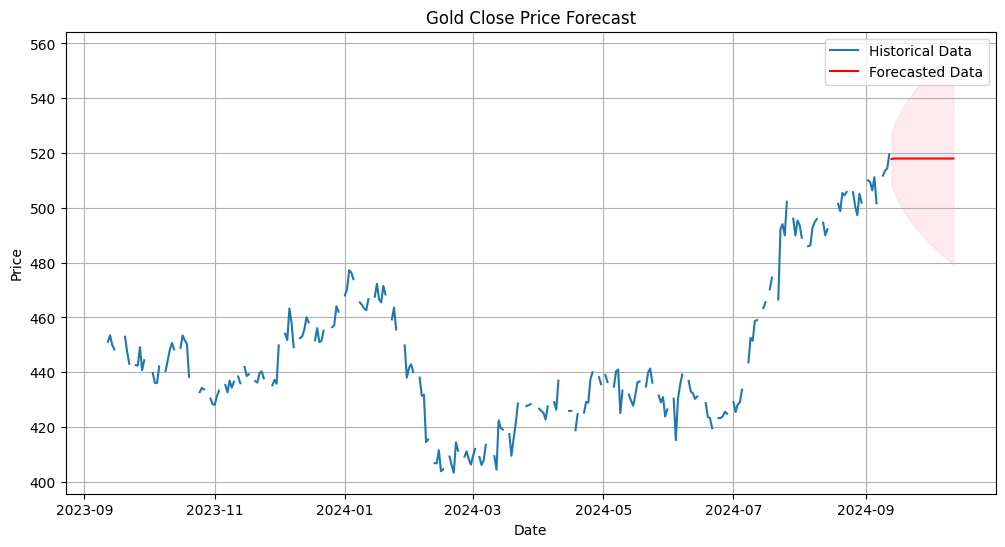

In [14]:
# Plot the results
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(metal_close_prices, label='Historical Data')

# Plot forecasted data
forecast_index = pd.date_range(start=metal_close_prices.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast.predicted_mean, color='r', label='Forecasted Data')

# Plot confidence intervals
plt.fill_between(forecast_index, 
                 confidence_interval['lower Gold_Close'], 
                 confidence_interval['upper Gold_Close'], 
                 color='pink', alpha=0.3)

plt.title('Gold Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()